In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('../data/gdp_percapita.csv.csv')

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv')

In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [5]:
#Question 5 How many rows and columns are in gdp_df? What are the data types of each column?
print(gdp_df.shape)
gdp_df.info()

(7662, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [6]:
#Question 6 : Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'
gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'},inplace=True)
gdp_df.drop(columns=['Value Footnotes'],inplace=True)

In [7]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


In [8]:
#Question 7 : How many countries have data for all years? Which countries are missing many years of data?
#Look at the number of observations per year. What do you notice?
gdp_countries = gdp_df.groupby('Country')
gdp_count = gdp_countries['Year'].count().sort_values()
print(gdp_count.to_string())

Country
Djibouti                                              10
Somalia                                               10
Turks and Caicos Islands                              12
Sint Maarten (Dutch part)                             14
Kosovo                                                15
Cayman Islands                                        16
Nauru                                                 19
Afghanistan                                           20
CuraÃ§ao                                              22
Palau                                                 22
SÃ£o TomÃ© and Principe                               22
Qatar                                                 23
Other small states                                    23
Timor-Leste                                           23
Liberia                                               23
Libya                                                 24
San Marino                                            25
Small states           

In [9]:
gdp_year = gdp_df.groupby('Year')
gdp_count2 = gdp_year['Country'].count().sort_values()
print(gdp_count2.to_string())

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2022    232
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2012    240
2011    240
2021    241
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242


Q7 Observation : As the number goes up for the count of country by year the number only
goes up. Meaning once the country is in the dataset it stays but any missing data is from before it was entered.

Question 8: Show GDP per capita for the year 2020. Create a histogram, a density plot, a boxplot, and a violin plot

In [12]:
gdp_capita2020 = gdp_df[gdp_df['Year']==2020]
print(gdp_capita2020)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
22    Africa Eastern and Southern  2020     3455.023119
55     Africa Western and Central  2020     3957.933804
88                        Albania  2020    13278.369769
121                       Algeria  2020    10844.770764
...                           ...   ...             ...
7503                     Viet Nam  2020    10450.622382
7536           West Bank and Gaza  2020     5402.538773
7565                        World  2020    16204.169107
7598                       Zambia  2020     3183.650773
7631                     Zimbabwe  2020     1990.319419

[242 rows x 3 columns]


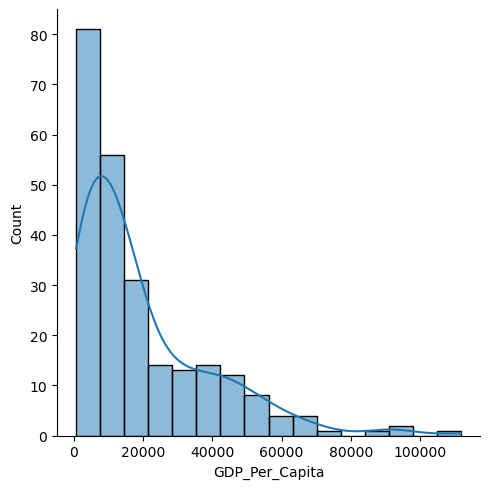

In [13]:
#Q8 Histogram
sns.displot( data=gdp_capita2020["GDP_Per_Capita"], kde=True )

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

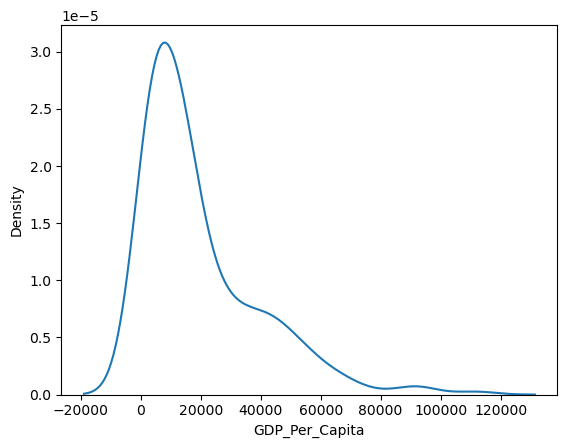

In [14]:
#Q8 Density Plot:
sns.kdeplot(gdp_capita2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita'>

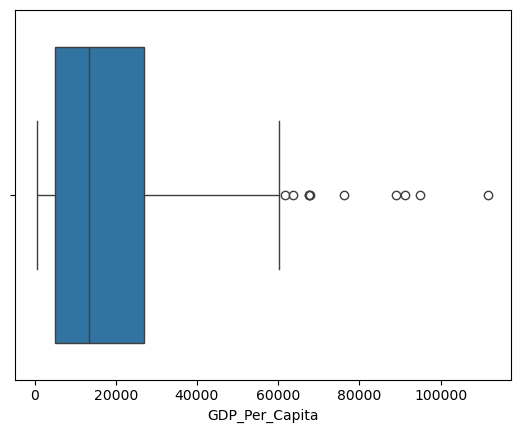

In [93]:
#Q8 Boxplot:
sns.boxplot( x=gdp_capita2020["GDP_Per_Capita"])

<Axes: ylabel='GDP_Per_Capita'>

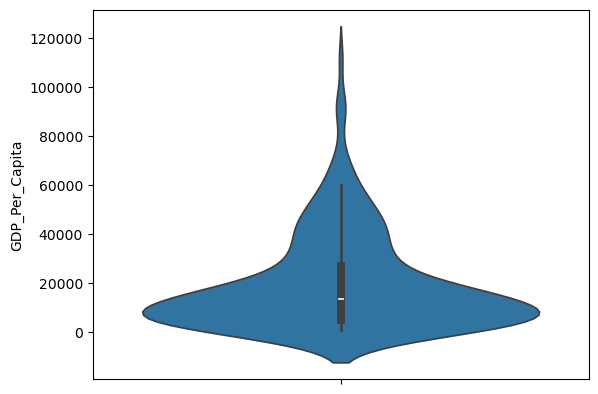

In [99]:
#Q8 Violin Plot:
sns.violinplot(y=gdp_capita2020["GDP_Per_Capita"])

Question 9: What was the median GDP per capita value in 2020?

In [19]:
gdp_capita2020['GDP_Per_Capita'].median()

13357.997573370474

Question 10: For this question, you're going to create some visualizations to compare GDP per capita values for the years
1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.
Using this, create the following 4 plots:
A boxplot
A barplot (check out the Barplot with Seaborn sectio)
A scatterplot
A scatterplot with a trend line overlrn)

In [21]:
decades=(1990,2000,2010,2020)
gdp_decades = gdp_df[gdp_df['Year'].isin(decades)]

Add plots here

Question 11: Which country was the first to have a GDP per capita greater than $100,000?

In [23]:
gdp_first100k = gdp_df[gdp_df['GDP_Per_Capita']>100000]
gdp_first100k.nsmallest(1, 'Year', keep='first')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


Question 12: Which country had the highest GDP per capita in 2020? Create a plot showing how this country's
GDP per capita has changed over the timespan of the dataset.

In [25]:
gdp_topgdp2020 = gdp_df[gdp_df['Year']==2020]
gdp_topgdp2020.nlargest(1, 'GDP_Per_Capita', keep='first')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


Question 13: Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [27]:
gdp_lowgdp2020 = gdp_df[gdp_df['Year']==2020]
gdp_lowgdp2020.nsmallest(1, 'GDP_Per_Capita', keep='first')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


Question 14: Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [106]:
pd.read_csv('../data/internet_use.csv.csv')

ParserError: Error tokenizing data. C error: Expected 4 fields in line 6378, saw 6


Question 15: Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [29]:
gdp_df.rename(columns={'Country or Area':'Country','GDP_Per_Capita':'Internet_Users_Pct'},inplace=True)
print(gdp_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2021         1517.016266
1     Afghanistan  2020         1968.341002
2     Afghanistan  2019         2079.921861
3     Afghanistan  2018         2060.698973
4     Afghanistan  2017         2096.093111
...           ...   ...                 ...
7657     Zimbabwe  1994         2670.106615
7658     Zimbabwe  1993         2458.783255
7659     Zimbabwe  1992         2468.278257
7660     Zimbabwe  1991         2781.787843
7661     Zimbabwe  1990         2704.757299

[7662 rows x 3 columns]


Question 16: Look at the number of observations in this dataset per year. What do you notice?

Question 17: What is the first year to have a non-zero internet users percentage value?

In [35]:
intusers_firstnonzero = gdp_df[gdp_df['Internet_Users_Pct']>0]
intusers_firstnonzero.nsmallest(1, 'Year', keep='first')

,Country,Year,Internet_Users_Pct
52,Africa Eastern and Southern,1990,3037.297466


Question 18: How does the distribution of internet users percent differ for 2000 and 2014?

In [44]:
intuser_00to14 = gdp_df[(gdp_df['Year'] >= 2000) & (gdp_df['Year'] <= 2014)]
print(intuser_00to14)

          Country  Year  Internet_Users_Pct
7     Afghanistan  2014         2144.449634
8     Afghanistan  2013         2165.340915
9     Afghanistan  2012         2122.830759
10    Afghanistan  2011         1961.096317
11    Afghanistan  2010         2026.163818
...           ...   ...                 ...
7647     Zimbabwe  2004         1934.164642
7648     Zimbabwe  2003         2067.880374
7649     Zimbabwe  2002         2510.228923
7650     Zimbabwe  2001         2772.325234
7651     Zimbabwe  2000         2750.601236

[3563 rows x 3 columns]


In [66]:
#sns.displot( data=gdp_df[intuser_00to14["Internet_Users_Pct"]], kde=True ) *Create a graph

Question 19: For how many countries was the percentage of internet users below 5% in 2014?

In [91]:
intuser_countrybelow5 = gdp_df[(gdp_df['Internet_Users_Pct'] < 5)]
print(intuser_countrybelow5)

Empty DataFrame
Columns: [Country, Year, Internet_Users_Pct]
Index: []
